# Enfermedades Cardiacas -KNN

Este notebook tiene el objetivo de utilizar KNN para clasificar a las personas con enfermedades cardiacas.

In [26]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import codecs

Pathfiles

In [27]:
current_path = os.getcwd()
training_data = os.path.join(current_path, 'Datos/training.txt')
test_data = os.path.join(current_path, 'Datos/test.txt')

In [28]:
training = []
trainingLabels = []
test = []
testLabels = []

In [29]:
with codecs.open(training_data, 'r', 'utf-8') as file:
    for line in file:
        elements = (line.rstrip('\n')).split(',')
        #append all the elements to the training list
        training.append([float(x) for x in elements[:-1]])
        #append the last element to the list as a label, changing the label to 0 or 1
        if elements[-1] == 'Present':
            trainingLabels.append(float(1))
        else:
            trainingLabels.append(float(0))


with codecs.open(test_data, 'r', 'utf-8') as file:
    for line in file:
        elements = (line.rstrip('\n')).split(',')
        #append all the elements to the test list
        test.append([float(x) for x in elements[:-1]])
        #append the last element to the list as a label
        if elements[-1] == 'Present':
            testLabels.append(float(1))
        else:
            testLabels.append(float(0))

knn

In [37]:
def knn(metric):
    accuracies = []
    ks = range(3, 42)

    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(training, trainingLabels)
        predictions = knn.predict(test)
        accuracy = accuracy_score(testLabels, predictions)
        accuracies.append(accuracy)
    
    best_k = ks[np.argmax(accuracies)]
    best_accuracy = max(accuracies)

    print(f'Best k: {best_k}')
    print(f'Best accuracy: {best_accuracy}')

    return best_k, best_accuracy

Classifier function

In [38]:
best_k, best_accuracy = knn('manhattan')
mink_k, mink_accuracy = knn('minkowski')

Best k: 14
Best accuracy: 0.7049180327868853
Best k: 4
Best accuracy: 0.6885245901639344


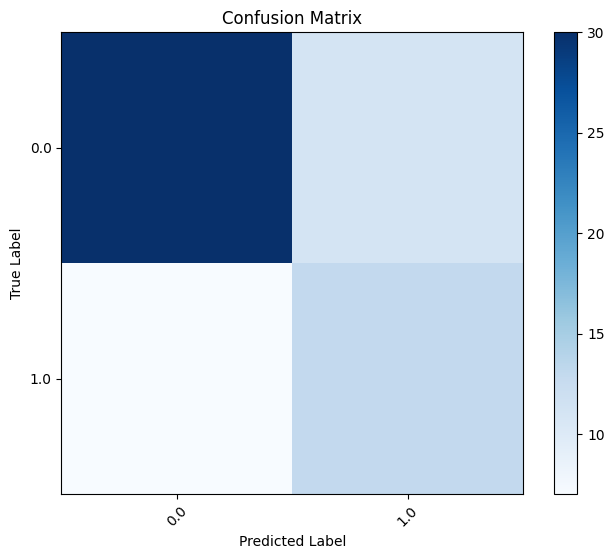

In [40]:
#Grafica de confusion para la mejor k de ambas metricas
knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn.fit(training, trainingLabels)
predictions = knn.predict(test)
conf_matrix = confusion_matrix(testLabels, predictions)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(testLabels)))
plt.xticks(tick_marks, set(testLabels), rotation=45)
plt.yticks(tick_marks, set(testLabels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()